# Create project

## Import

In [1]:
%matplotlib inline

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyiron import Project, Atoms
from scipy.optimize import minimize

In [3]:
import warnings  # ignore Lammps warnings 
warnings.filterwarnings("ignore")

## Clean up

In [4]:
pr = Project('fitting')
pr.remove_jobs_silently(recursive=True)

In [5]:
pr = Project('import')
pr.remove_jobs_silently(recursive=True)

In [6]:
pr = Project('dft')
pr.remove_jobs_silently(recursive=True)

# Get fitting data 

## Create VASP calculation 

### Setup VASP

In [7]:
job_vasp = pr.create_job(job_type=pr.job_type.Vasp, job_name='vasp')

In [8]:
job_vasp.structure = pr.create_ase_bulk('Al')

In [9]:
job_vasp.input.incar

,Parameter,Value,Comment
0,SYSTEM,vasp,jobname
1,PREC,Accurate,
2,ALGO,Fast,
3,LREAL,False,
4,LWAVE,False,
5,LORBIT,0,


In [10]:
job_vasp.input.kpoints

,Parameter,Value,Comment
0,,Kpoints file generated with pyiron,
1,,0,
2,,Monkhorst_Pack,
3,,4 4 4,
4,,0 0 0,


### Calculate Murnaghan 

In [11]:
murn = job_vasp.create_job(job_type=pr.job_type.Murnaghan, job_name='murn')

In [12]:
murn.server.queue = "cm"

In [13]:
murn.server.cores = 11

In [14]:
murn.run()

The job murn was saved and received the ID: 206


100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


Queue system id:  1015670


In [15]:
pr.wait_for_job(murn)

100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


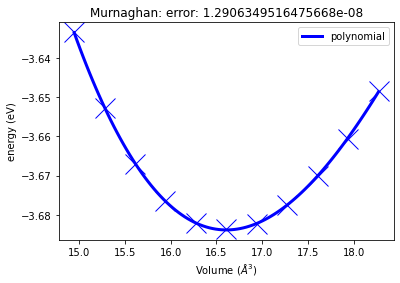

In [16]:
murn.plot()

### Overview 

In [17]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,206,finished,Al,murn,/murn,/Users/jan/pyiron/projects/,2020/2020-08-26-meeting-cambridge/dft/,2020-08-26 17:45:16.116730,NaT,NaN,pyiron@MacBook-Pro.local#11#cm#0,Murnaghan,0.3.0,None,None
1,207,finished,None,strain_0_9,/strain_0_9,/Users/jan/pyiron/projects/,2020/2020-08-26-meeting-cambridge/dft/murn_hdf5/,2020-08-26 17:45:45.665971,2020-08-26 17:45:45.665971,0.0,None,Vasp,5.4.4,None,None
2,208,finished,None,strain_0_92,/strain_0_92,/Users/jan/pyiron/projects/,2020/2020-08-26-meeting-cambridge/dft/murn_hdf5/,2020-08-26 17:45:55.925491,2020-08-26 17:45:55.925491,0.0,None,Vasp,5.4.4,None,None
3,209,finished,None,strain_0_94,/strain_0_94,/Users/jan/pyiron/projects/,2020/2020-08-26-meeting-cambridge/dft/murn_hdf5/,2020-08-26 17:45:46.806305,2020-08-26 17:45:46.806305,0.0,None,Vasp,5.4.4,None,None
4,210,finished,None,strain_0_96,/strain_0_96,/Users/jan/pyiron/projects/,2020/2020-08-26-meeting-cambridge/dft/murn_hdf5/,2020-08-26 17:45:52.926321,2020-08-26 17:45:52.926321,0.0,None,Vasp,5.4.4,None,None
5,211,finished,None,strain_0_98,/strain_0_98,/Users/jan/pyiron/projects/,2020/2020-08-26-meeting-cambridge/dft/murn_hdf5/,2020-08-26 17:45:53.838100,2020-08-26 17:45:53.838100,0.0,None,Vasp,5.4.4,None,None
6,212,finished,None,strain_1_0,/strain_1_0,/Users/jan/pyiron/projects/,2020/2020-08-26-meeting-cambridge/dft/murn_hdf5/,2020-08-26 17:45:49.306411,2020-08-26 17:45:49.306411,0.0,None,Vasp,5.4.4,None,None
7,213,finished,None,strain_1_02,/strain_1_02,/Users/jan/pyiron/projects/,2020/2020-08-26-meeting-cambridge/dft/murn_hdf5/,2020-08-26 17:45:54.904650,2020-08-26 17:45:54.904650,0.0,None,Vasp,5.4.4,None,None
8,214,finished,None,strain_1_04,/strain_1_04,/Users/jan/pyiron/projects/,2020/2020-08-26-meeting-cambridge/dft/murn_hdf5/,2020-08-26 17:45:51.687949,2020-08-26 17:45:51.687949,0.0,None,Vasp,5.4.4,None,None
9,215,finished,None,strain_1_06,/strain_1_06,/Users/jan/pyiron/projects/,2020/2020-08-26-meeting-cambridge/dft/murn_hdf5/,2020-08-26 17:45:56.961379,2020-08-26 17:45:56.961379,0.0,None,Vasp,5.4.4,None,None


## Or Import VASP calculation 

In [18]:
for job in pr.iter_jobs():
    job.decompress()

In [19]:
pr_import = Project('import')

In [20]:
pr_import.import_from_path(path='dft', recursive=True)

strain_0_98 strain_0_98
job was stored with the job ID  218
strain_0_94 strain_0_94
job was stored with the job ID  219
strain_1_0 strain_1_0
job was stored with the job ID  220
strain_0_92 strain_0_92
job was stored with the job ID  221
strain_0_9 strain_0_9
job was stored with the job ID  222
strain_1_1 strain_1_1
job was stored with the job ID  223
strain_1_06 strain_1_06
job was stored with the job ID  224
strain_1_08 strain_1_08
job was stored with the job ID  225
strain_1_04 strain_1_04
job was stored with the job ID  226
strain_0_96 strain_0_96
job was stored with the job ID  227
strain_1_02 strain_1_02
job was stored with the job ID  228


# Fit potential 

## Collect VASP calculation 

### Setup pyiron table

In [21]:
pr_fit = Project('fitting')

In [22]:
pyiron_table = pr_fit.create_job(job_type=pr_fit.job_type.TableJob, job_name='analysis')

In [23]:
pyiron_table.analysis_project = pr_import
# pyiron_table.analysis_project = pr

In [24]:
pyiron_table.add.get_structure
pyiron_table.add.get_energy_tot
pyiron_table.add.get_forces
pyiron_table.add.get_job_name

True

In [25]:
pyiron_table.filter_function = pyiron_table.filter.job_type(pr.job_type.Vasp)

In [26]:
pyiron_table.run()

  0%|          | 0/11 [00:00<?, ?it/s]

The job analysis was saved and received the ID: 229


100%|██████████| 11/11 [00:13<00:00,  1.22s/it]
2020-08-26 17:46:54,689 - pyiron_log - WARNING - The job analysis is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


### Summary

In [27]:
df_fit = pyiron_table.get_dataframe().sort_values(by='job_name')
df_fit

,job_name,job_id,energy_tot,structure,forces
4,strain_0_9,222,-3.633465,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 1.955116, 1.955116], [1.955116, 0.0, 1.955116], [1.955116, 1.955116, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],...","[[0.0, 0.0, 0.0]]"
3,strain_0_92,221,-3.652753,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 1.969492, 1.969492], [1.969492, 0.0, 1.969492], [1.969492, 1.969492, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],...","[[0.0, 0.0, 0.0]]"
1,strain_0_94,219,-3.666954,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 1.983662, 1.983662], [1.983662, 0.0, 1.983662], [1.983662, 1.983662, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],...","[[0.0, 0.0, 0.0]]"
9,strain_0_96,227,-3.676548,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 1.997632, 1.997632], [1.997632, 0.0, 1.997632], [1.997632, 1.997632, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],...","[[-0.0, 0.0, 0.0]]"
0,strain_0_98,218,-3.682013,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.011409, 2.011409], [2.011409, 0.0, 2.011409], [2.011409, 2.011409, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],...","[[0.0, 0.0, 0.0]]"
2,strain_1_0,220,-3.683725,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.025, 2.025], [2.025, 0.0, 2.025], [2.025, 2.025, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0], [0.0]]}","[[-0.0, 0.0, 0.0]]"
10,strain_1_02,228,-3.682209,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.038411, 2.038411], [2.038411, 0.0, 2.038411], [2.038411, 2.038411, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],...","[[0.0, -0.0, 0.0]]"
8,strain_1_04,226,-3.677397,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.051648, 2.051648], [2.051648, 0.0, 2.051648], [2.051648, 2.051648, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],...","[[0.0, 0.0, 0.0]]"
6,strain_1_06,224,-3.670148,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.064716, 2.064716], [2.064716, 0.0, 2.064716], [2.064716, 2.064716, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],...","[[0.0, 0.0, 0.0]]"
7,strain_1_08,225,-3.660563,"{""symbols"": [""Al""], ""positions"": [[0.0, 0.0, 0.0]], ""cell"": [[0.0, 2.077621, 2.077621], [2.077621, 0.0, 2.077621], [2.077621, 2.077621, 0.0]], ""pbc"": [true, true, true], ""celldisp"": [[0.0], [0.0],...","[[0.0, 0.0, 0.0]]"


## Fit lennard jones potential 

### Define Fit functions 

In [28]:
def set_structure_run_and_get_energy_and_forces(job, structure): 
    job.structure = structure 
    job.run()
    return job.output.energy_tot[-1], job.output.forces[-1] 

In [29]:
def get_potential(eps, sigma, cutoff=10.0):
    return pd.DataFrame({'Name': ['Al3ScLennardJones'],
                         'Filename': [[]],                             
                         'Model'   : ['LJ'], 
                         'Species' : [['Al']], 
                         'Config'  : [['pair_style lj/cut %f \n'%cutoff, 
                                       'pair_coeff 1 1 %.16f %.16f \n'%(eps, sigma)]]})

In [30]:
def compute_lj(job_lj, structure_lst, energy_lst, forces_lst, eps, sigma, cutoff=10.0, force_weight=0.1):
    method_dict['eps'].append(eps)
    method_dict['sigma'].append(sigma)
    job_lj.potential = get_potential(eps, sigma, cutoff)
    lj_energy_lst, lj_force_lst = zip(*[set_structure_run_and_get_energy_and_forces(job_lj, structure) for structure in structure_lst])
    total_loss = (np.linalg.norm(np.array(energy_lst) - np.array(lj_energy_lst))) + force_weight*np.linalg.norm(np.array(forces_lst) - np.array(lj_force_lst))
    method_dict['loss'].append(total_loss)
    return total_loss

In [31]:
def loss(initial_params): 
    eps, sigma = initial_params
    return compute_lj(job_lj=job_lj, 
                      structure_lst=structure_lst, 
                      energy_lst=energy_tot,
                      eps=eps, 
                      sigma=sigma, 
                      forces_lst=forces) 

### Datastructure 

In [32]:
method_dict = {'eps': [], 'sigma': [], 'loss': []}

In [33]:
energy_tot = df_fit.energy_tot.values
# energy_tot -= np.min(energy_tot)  # normalise to the equlibrium energy 
structure_lst = [Atoms(**json.loads(s)) for s in df_fit.structure.values]
forces = np.array([json.loads(f) for f in df_fit.forces.values])

### Run fitting 

In [34]:
job_lj = pr_fit.create_job(job_name='lj_fitting', job_type=pr_fit.job_type.Lammps)
job_lj.server.run_mode.interactive = True
job_lj.interactive_enforce_structure_reset = True

In [35]:
res = minimize(loss, [0.5, 2.5], method='Nelder-Mead')
res

The job lj_fitting was saved and received the ID: 230


 final_simplex: (array([[0.44137738, 2.61414009],
       [0.44134914, 2.61407324],
       [0.44135744, 2.6141984 ]]), array([0.11948243, 0.11948461, 0.11948472]))
           fun: 0.11948242773199413
       message: 'Optimization terminated successfully.'
          nfev: 55
           nit: 28
        status: 0
       success: True
             x: array([0.44137738, 2.61414009])

In [36]:
res.success

True

In [37]:
eps_final, sigma_final = res.x 

In [38]:
job_lj.interactive_close()

### Plots 

Text(0.5, 0, 'iteration')

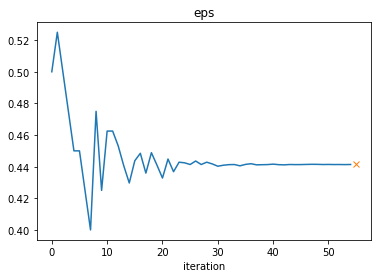

In [39]:
plt.plot(method_dict['eps'])
plt.plot([len(method_dict['eps'])], [eps_final], 'x')
plt.title('eps')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

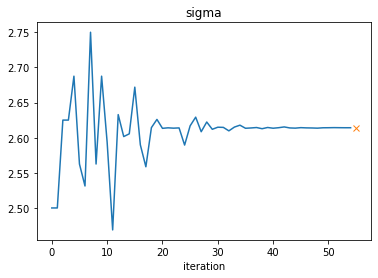

In [40]:
plt.plot(method_dict['sigma'])
plt.plot([len(method_dict['sigma'])], [sigma_final], 'x')
plt.title('sigma')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

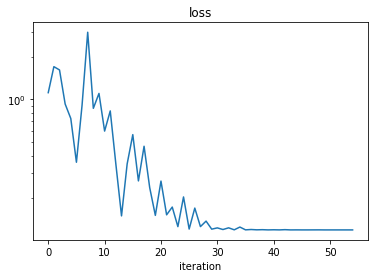

In [41]:
plt.plot(method_dict['loss'])
plt.title('loss')
plt.yscale('log')
plt.xlabel('iteration')

### Validation 

In [42]:
job_lj = pr_fit.create_job(job_name='lj_validation', job_type=pr_fit.job_type.Lammps)
job_lj.server.run_mode.interactive = True
job_lj.interactive_enforce_structure_reset = True

In [43]:
job_lj.potential = get_potential(eps=eps_final, sigma=sigma_final, cutoff=10.0)

In [44]:
job_lj.structure = structure_lst[len(structure_lst)//2]

In [45]:
murn = job_lj.create_job(job_type=pr_fit.job_type.Murnaghan, job_name='murn')

In [46]:
murn.run()

The job murn was saved and received the ID: 231
The job murn_lj_validation was saved and received the ID: 232


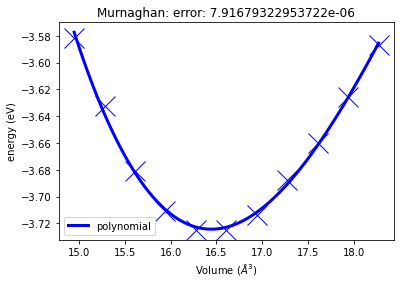

In [47]:
murn.plot()

# Debugging 

In [48]:
murn['output/energy']

array([-3.58127705, -3.63234679, -3.68120827, -3.71092214, -3.72461463,
       -3.72492051, -3.71406429, -3.68737117, -3.6597912 , -3.6258606 ,
       -3.58672662])

In [49]:
energy_tot

array([-3.63346466, -3.65275266, -3.66695446, -3.67654829, -3.68201295,
       -3.68372519, -3.68220902, -3.67739734, -3.67014759, -3.66056283,
       -3.64848126])

In [50]:
np.isclose(np.array([s.get_volume() for s in structure_lst]), murn['output/volume'])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [51]:
structure_lst

[Al: [0. 0. 0.]
 pbc: [ True  True  True]
 cell: 
 Cell([[0.0, 1.955116, 1.955116], [1.955116, 0.0, 1.955116], [1.955116, 1.955116, 0.0]]),
 Al: [0. 0. 0.]
 pbc: [ True  True  True]
 cell: 
 Cell([[0.0, 1.969492, 1.969492], [1.969492, 0.0, 1.969492], [1.969492, 1.969492, 0.0]]),
 Al: [0. 0. 0.]
 pbc: [ True  True  True]
 cell: 
 Cell([[0.0, 1.983662, 1.983662], [1.983662, 0.0, 1.983662], [1.983662, 1.983662, 0.0]]),
 Al: [0. 0. 0.]
 pbc: [ True  True  True]
 cell: 
 Cell([[0.0, 1.997632, 1.997632], [1.997632, 0.0, 1.997632], [1.997632, 1.997632, 0.0]]),
 Al: [0. 0. 0.]
 pbc: [ True  True  True]
 cell: 
 Cell([[0.0, 2.011409, 2.011409], [2.011409, 0.0, 2.011409], [2.011409, 2.011409, 0.0]]),
 Al: [0. 0. 0.]
 pbc: [ True  True  True]
 cell: 
 Cell([[0.0, 2.025, 2.025], [2.025, 0.0, 2.025], [2.025, 2.025, 0.0]]),
 Al: [0. 0. 0.]
 pbc: [ True  True  True]
 cell: 
 Cell([[0.0, 2.038411, 2.038411], [2.038411, 0.0, 2.038411], [2.038411, 2.038411, 0.0]]),
 Al: [0. 0. 0.]
 pbc: [ True  True  Tr

In [52]:
forces

array([[[ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.]],

       [[-0.,  0.,  0.]],

       [[ 0.,  0.,  0.]],

       [[-0.,  0.,  0.]],

       [[ 0., -0.,  0.]],

       [[ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.]]])

In [53]:
method_dict

{'eps': [0.5,
  0.525,
  0.5,
  0.475,
  0.44999999999999996,
  0.44999999999999996,
  0.4249999999999998,
  0.3999999999999999,
  0.475,
  0.42499999999999993,
  0.46249999999999997,
  0.4624999999999999,
  0.45312499999999994,
  0.440625,
  0.4296874999999999,
  0.44375,
  0.44843749999999993,
  0.4359374999999999,
  0.4488281249999999,
  0.441015625,
  0.43281250000000004,
  0.44482421874999994,
  0.43681640625,
  0.44282226562499993,
  0.44243164062499984,
  0.44136962890625,
  0.4435668945312499,
  0.4413604736328125,
  0.4428314208984374,
  0.44172821044921873,
  0.44027557373046877,
  0.4409122467041015,
  0.4412708282470702,
  0.44134492874145503,
  0.44052896499633787,
  0.4414283990859985,
  0.44186108112335204,
  0.44114945530891414,
  0.4412329256534576,
  0.44131692796945565,
  0.44159587174654,
  0.4412610594183206,
  0.44114958830177775,
  0.4413586963899433,
  0.44130282783880825,
  0.4413134029367938,
  0.44141103990841646,
  0.44148603015346444,
  0.441456333361566,
 